In [ ]:
results = {}

Put MC: 4.755128240910258
SE: 0.026743066395230726


C:\Users\dirk_\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


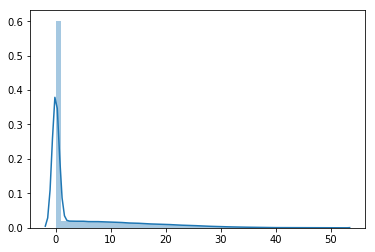

In [58]:
%matplotlib inline
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy.stats import norm


N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
k = 99
T = 1
P_list = []
for Z in epsilons:
    S_T = S_0*np.exp((r-0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z)
    P = max((k - S_T), 0)
    P_list.append(P)
    
P_est = np.exp(-r*T)*np.mean(P_list)
S_E = np.std(P_list) / np.sqrt(N)
higer_confidence_intrval_95 = P_est + S_E * 0.05
lower_confidence_intrval_95 = P_est - S_E * 0.05

# print(mean, S_E)

print("Put MC: " + str(P_est))
print("SE: "+str(S_E))

sns.distplot(P_list, kde=True, rug=False);

# print(C_list) 
    

In [258]:
import matplotlib.pyplot as plt
import numpy as np
import math


def monte_carlo(k, sigma):
    P_list = []
    for Z in epsilons:
        S_T = S_0*np.exp((r-0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z)
        P = max((k - S_T), 0)
        P_list.append(P)

    P_est = np.exp(-r*T)*np.mean(P_list)
    S_E = np.std(P_list) / np.sqrt(N)
    higer_confidence_intrval_95 = P_est + (S_E * 1.96)
    lower_confidence_intrval_95 = P_est - (S_E * 1.96)
    return P_est, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95


In [ ]:
results['trials'] = {}
N = 100000
S_0 = 100
r= 0.06
sigma = 0.2
k = 99
T = 1

Ns = np.logspace(4, 7, 50, endpoint=True)
results['trials']['x'] = []
results['trials']['p'] = []
results['trials']['SE'] = []
for N in Ns:
    epsilons = np.random.randn(int(N))
    P_est, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95 = monte_carlo(K, sigma)
    x = np.linspace(P_est - 2*S_E, P_est + 2*S_E, 100)
    plt.plot(x,norm.pdf(x, P_est, S_E), label='N: '+str(N))
    
    results['trials']['x'].append(N)
    results['trials']['p'].append(P_est)
    results['trials']['SE'].append(S_E)
    
#     print("Put MC: " + str(P_est))
#     print("SE: "+str(S_E))
    
    
plt.legend()    
plt.show()

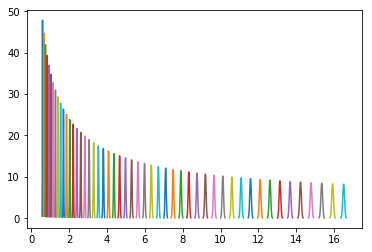

In [260]:
results['strike'] = {}

N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

Ks = np.linspace(80 , 120, 50)
results['strike']['x'] = []
results['strike']['p'] = []
results['strike']['SE'] = []
results['strike']['BS_p'] = []
for K in Ks:
    P_est, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95 = monte_carlo(K, sigma)
    x = np.linspace(P_est - 3*S_E, P_est + 3*S_E, 100)
    plt.plot(x,norm.pdf(x, P_est, S_E))
    
    results['strike']['x'].append(K)
    results['strike']['p'].append(P_est)
    results['strike']['SE'].append(S_E)
    results['strike']['BS_p'].append(BS_P_strike(K))
    
#     print("Put MC: " + str(P_est))
#     print("SE: "+str(S_E))
    
plt.show()


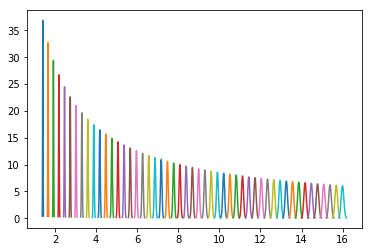

In [261]:
results['sigma'] = {}
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

sigmas = np.linspace(0.10 , 0.50, 50)
results['sigma']['x'] = []
results['sigma']['p'] = []
results['sigma']['SE'] = []
results['sigma']['BS_p'] = []
for sigma in sigmas:
    P_est, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95 = monte_carlo(K, sigma)
    x = np.linspace(P_est - 3*S_E, P_est + 3*S_E, 100)
    plt.plot(x,norm.pdf(x, P_est, S_E))
    
    results['sigma']['x'].append(sigma)
    results['sigma']['p'].append(P_est)
    results['sigma']['SE'].append(S_E)
    results['sigma']['BS_p'].append(BS_P_sigma(sigma))
plt.show()

# 2


In [263]:
def BS_delta():
    t = 0
    d1 = (np.log(S_0/K) + (r + 0.5*sigma**2) * (T - t)) / (sigma*np.sqrt(T - t))
    BS_delta = norm.cdf(d1)-1
    return BS_delta

def BS_C():
    d1 = (np.log(S_0/K)+(r+sigma**2/2) * T) / sigma*np.sqrt(T)
    d2 = d1 - sigma*T
    c = norm.cdf(d1)*S_0-norm.cdf(d2)*K*np.exp(-1*r*T)
    return c

def BS_P():
    d1 = (np.log(S_0/K)+(r+sigma**2/2) * T) / sigma*np.sqrt(T)
    d2 = d1 - sigma*T
    p = norm.cdf(-d2)*K*np.exp(-r*T) - norm.cdf(-d1)*S_0
    return p
def BS_P_sigma(sigma):
    d1 = (np.log(S_0/K)+(r+sigma**2/2) * T) / sigma*np.sqrt(T)
    d2 = d1 - sigma*T
    p = norm.cdf(-d2)*K*np.exp(-r*T) - norm.cdf(-d1)*S_0
    return p

def BS_P_strike(K):
    d1 = (np.log(S_0/K)+(r+sigma**2/2) * T) / sigma*np.sqrt(T)
    d2 = d1 - sigma*T
    p = norm.cdf(-d2)*K*np.exp(-r*T) - norm.cdf(-d1)*S_0
    return p

def BS_delta_digital():
    d2 = np.log(S_0/K) + (r-sigma**2/2)*T/(sigma*np.sqrt(T))
    c = np.exp(-r*T)*norm.cdf(d2)
#     delta = np.exp(-r*T)*
#     p = norm.cdf(-d2)*np.exp(-r*T) - norm.cdf(-d1)*S_0
    deriv = np.diff(norm.cdf(d2))/dx
    

In [ ]:
var_delta

# Same Seed

In [ ]:
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

results['MC_bump'] = {}
def monte_carlo_bump(k, sigma, e):
    Ps = []
    Ps_bump = []
    Zs = np.random.randn(int(N))

    for Z in Zs:
        
        S_T = S_0 * np.exp((r - 0.5*(sigma**2)) * T + sigma * np.sqrt(T) * Z)
        S_T_bump = (S_0+e) * np.exp((r - 0.5*(sigma**2)) * T + sigma * np.sqrt(T) * Z)
        
        P = max((k - S_T), 0)
        P_bump =  max((k - S_T_bump), 0)
        
        Ps_bump.append(P_bump)
        Ps.append(P)
    
    P_est = np.exp(-r*T) * np.mean(Ps)
    SE_est = np.std(Ps) / np.sqrt(N)

    P_bump_est = np.exp(-r*T) * np.mean(Ps_bump)
    SE_bump_est = np.std(Ps_bump) / np.sqrt(N)
    
    delta = (P_bump_est - P_est) / e
    
    var_P = np.var(Ps)
    var_P_bump = np.var(Ps_bump)
    cov = np.cov(Ps, Ps_bump)[0][1]
    var_delta = (.5*e**2)*(var_P + var_P_bump - 2*cov)

    return delta, P_est, SE_est, var_delta

BS_d = BS_delta()

Ns = np.logspace(4, 7, 50, endpoint=True)
e = 0.01

results['MC_bump']['x'] = []
results['MC_bump']['delta'] = []
results['MC_bump']['p'] = []
results['MC_bump']['SE'] = []
results['MC_bump']['var_delta'] = []

for N in Ns:    

    MC_delta, P_est, SE_est, var_delta = monte_carlo_bump(K, sigma, e)
    relative_error = np.abs(MC_delta - BS_d)/BS_d
    
    results['MC_bump']['x'].append(N)
    results['MC_bump']['delta'].append(MC_delta)
    results['MC_bump']['p'].append(P_est)
    results['MC_bump']['SE'].append(SE_est)
    results['MC_bump']['var_delta'].append(var_delta)    

# Different Seed

In [ ]:
N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

results['MC_bump_2Seeds'] = {}

def monte_carlo_bump(k, sigma, e):
    
    Ps = []
    Ps_bump = []
    Zs = np.random.randn(int(N))
    Zs_2 = np.random.randn(int(N))

    for Z1, Z2 in zip(Zs,Zs_2):
        
        S_T = S_0*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z1)
        S_T_bump = (S_0+e)*np.exp((r - 0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z2)
        
        P = max((k - S_T), 0)
        P_bump =  max((k - S_T_bump), 0)
        
        Ps_bump.append(P_bump)
        Ps.append(P)
    
    P_est = np.exp(-r*T)*np.mean(Ps)
    SE_est = np.std(Ps)/np.sqrt(N)

    P_bump_est = np.exp(-r*T)*np.mean(Ps_bump)
    SE_bump_est = np.std(Ps_bump)/np.sqrt(N)
    
    delta = (P_bump_est - P_est)/e
    var_P = np.var(Ps)
    var_P_bump = np.var(Ps_bump)
    cov = np.cov(Ps, Ps_bump)[0][1]
    var_delta = (.5*e**2)*(var_P + var_P_bump - 2*cov)    
    
    return delta, P_est, SE_est, var_delta

BS_d = BS_delta()
Ns = np.logspace(4, 7, 50, endpoint=True)
e = 0.01

results['MC_bump_2Seeds']['x'] = []
results['MC_bump_2Seeds']['delta'] = []
results['MC_bump_2Seeds']['p'] = []
results['MC_bump_2Seeds']['SE'] = []
results['MC_bump_2Seeds']['var_delta'] = []

for N in Ns:    
    
    MC_delta, P_est, SE_est, var_delta = monte_carlo_bump(K, sigma, e)
    relative_error = np.abs(MC_delta - BS_d)/BS_d
    
    results['MC_bump_2Seeds']['x'].append(N)
    results['MC_bump_2Seeds']['delta'].append(MC_delta)
    results['MC_bump_2Seeds']['p'].append(P_est)
    results['MC_bump_2Seeds']['SE'].append(SE_est)
    results['MC_bump_2Seeds']['var_delta'].append(var_delta)

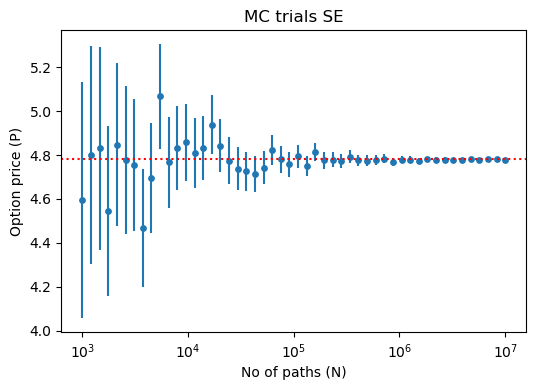

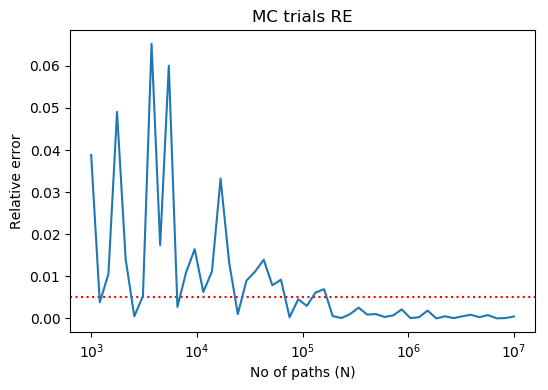

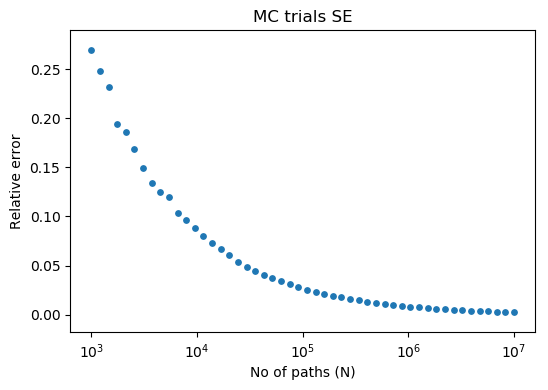

In [280]:
data = results['trials']

S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1
BS_p = BS_P()

# SE of MC estimate
plt.figure(dpi=100)
plt.axhline(y=BS_P(), color='r', linestyle=':', label='BS')
plt.scatter(data['x'],data['p'], s=15)
plt.errorbar(data['x'],data['p'],yerr=[i*2 for i in data['SE']],fmt='none')
plt.xscale('symlog')
plt.title('MC trials SE')
plt.xlabel('No of paths (N)')
plt.ylabel('Option price (P)')
plt.savefig('images/assigment2/MC_trials_SE.png')
plt.show()

# Relative error MC estimate
plt.figure(dpi=100)
plt.axhline(y=.005, color='r', linestyle=':', label='BS')
plt.plot(data['x'], [np.abs((BS_p-i)/BS_p) for i in data['p']])
plt.xscale('symlog')
plt.title('MC trials RE')
plt.xlabel('No of paths (N)')
plt.ylabel('Relative error')
plt.savefig('images/assigment2/MC_trials_RE.png')
plt.show()

# SE vs N
plt.figure(dpi=100)
plt.scatter(data['x'],data['SE'], s=15)
plt.xscale('symlog')
plt.title('MC trials SE')
plt.xlabel('No of paths (N)')
plt.ylabel('Relative error')
plt.savefig('images/assigment2/MC_trials_SE-N.png')
plt.show()

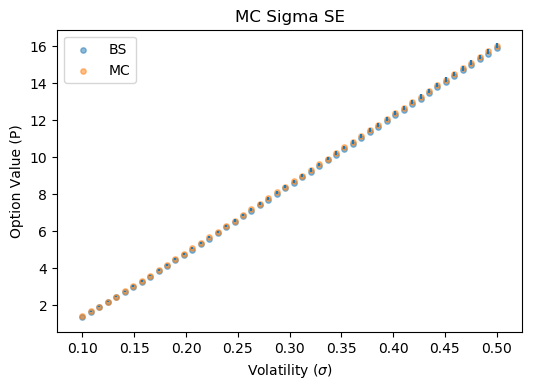

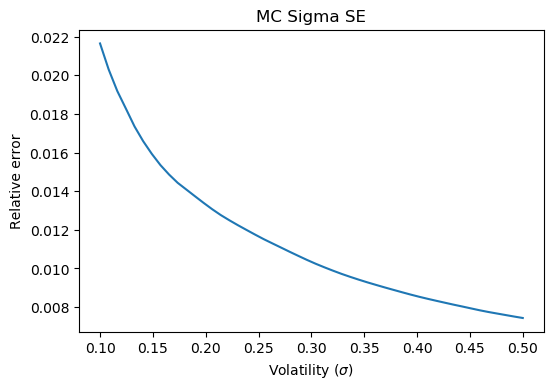

In [290]:
data = results['sigma']

S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

# SE of MC estimate
plt.figure(dpi=100)
plt.scatter(data['x'],data['BS_p'], alpha=.5, label='BS', s=15)
plt.scatter(data['x'],data['p'], alpha=.5, label='MC', s=15)
plt.errorbar(data['x'],data['p'],yerr=[i*2 for i in data['SE']],fmt='none')
# plt.xscale('symlog')
plt.legend()
plt.title('MC Sigma SE')
plt.xlabel(r'Volatility ($\sigma$)')
plt.ylabel('Option Value (P)')
plt.savefig('images/assigment2/MC_Sigma_SE.png')
plt.show()

# Relative error MC estimate
plt.figure(dpi=100)
plt.plot(data['x'], [np.abs((BS_p-i))/BS_p for i, BS_p in zip(data['p'],data['BS_p'])])
plt.title('MC Sigma SE')
plt.xlabel(r'Volatility ($\sigma$)')
plt.ylabel('Relative error')
plt.savefig('images/assigment2/MC_Sigma_RE.png')
plt.show()
# plt.xscale('symlog')

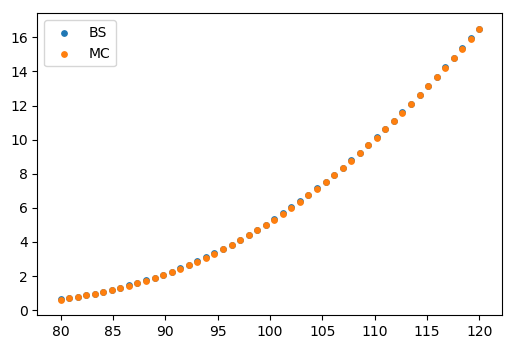

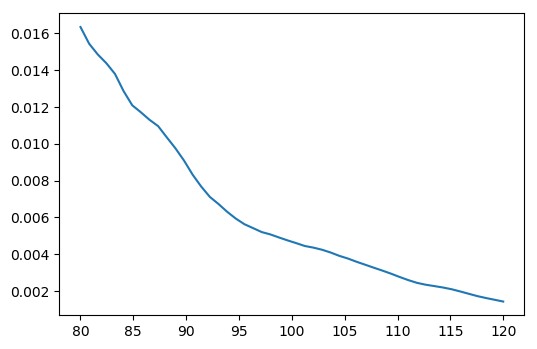

In [268]:
data = results['strike']

S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1

# SE of MC estimate
plt.figure(dpi=100)
plt.scatter(data['x'],data['BS_p'], label='BS', s=15)
plt.scatter(data['x'],data['p'], label='MC', s=15)
# plt.errorbar(data['x'],data['p'],yerr=[i*2 for i in data['SE']],fmt='none')
# plt.xscale('symlog')
plt.legend()
plt.savefig('images/assigment2/MC_Strike_SE.png')
plt.show()

# Relative error MC estimate
plt.figure(dpi=100)
plt.plot(data['x'], [np.abs((BS_p-i)/BS_p) for i, BS_p in zip(data['p'],data['BS_p'])])
plt.savefig('images/assigment2/MC_Strike_RE.png')
plt.show()
# plt.xscale('symlog')

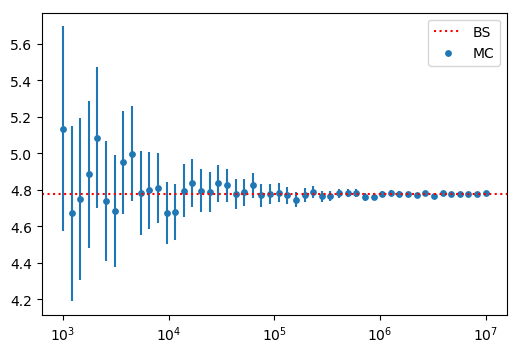

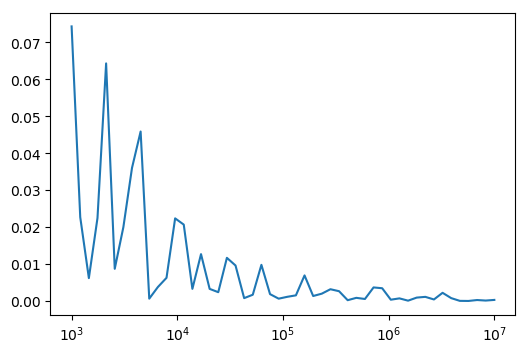

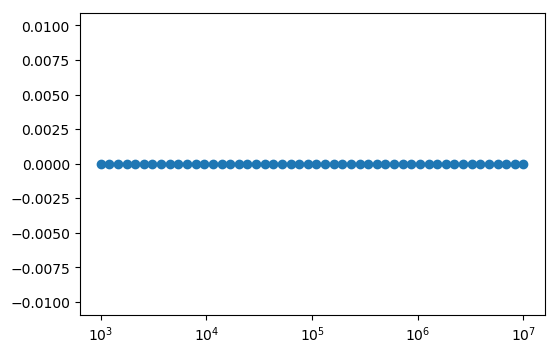

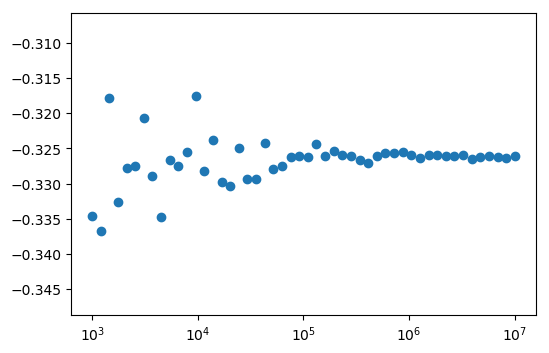

-0.3262644882651039


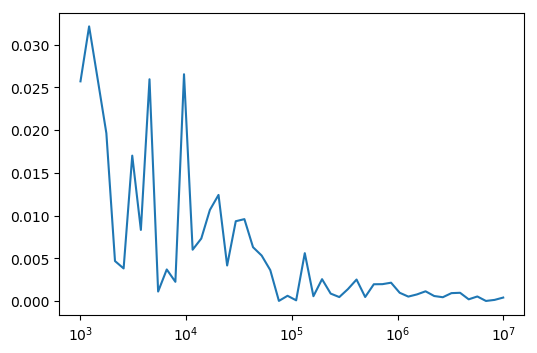

In [297]:
data=results["MC_bump"]

BS_p = BS_P()

# SE of MC estimate
plt.figure(dpi=100)
# plt.scatter(data['x'],data['BS_p'], label='BS', s=15)
plt.axhline(y=BS_P(), color='r', linestyle=':', label='BS')
plt.scatter(data['x'], data['p'], label = 'MC', s=15)
plt.errorbar(data['x'], data['p'], yerr = [i*2 for i in data['SE']], fmt='none')
plt.xscale('symlog')
plt.legend()
plt.savefig('images/assigment2/MC_Bump_SE.png')
plt.show()

# Relative error MC estimate
plt.figure(dpi=100)
plt.plot(data['x'], [np.abs((BS_p-i)/BS_p) for i in data['p']])
plt.xscale('symlog')
plt.savefig('images/assigment2/MC_Bump_RE.png')
plt.show()

# Variance
plt.figure(dpi=100)
plt.scatter(data['x'], data['var_delta'])
plt.xscale('symlog')
plt.show()

# Delta
plt.figure(dpi=100)
plt.scatter(data['x'], data['delta'])
plt.xscale('symlog')
plt.show()

BS_d = BS_delta()
print(BS_d)
# Delta Relative Error
plt.figure(dpi=100)
plt.plot(data['x'], [np.abs((BS_d-i)/BS_d) for i in data['delta']])
plt.xscale('symlog')
plt.savefig('images/assigment2/MC_Bump_delta_RE.png')
plt.show()

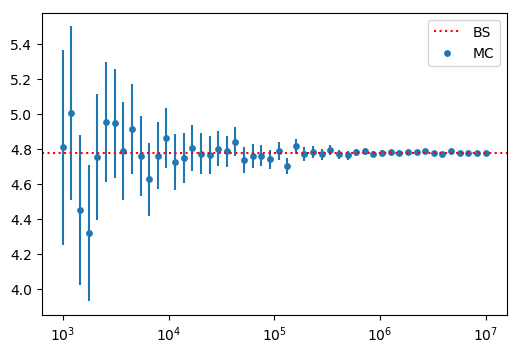

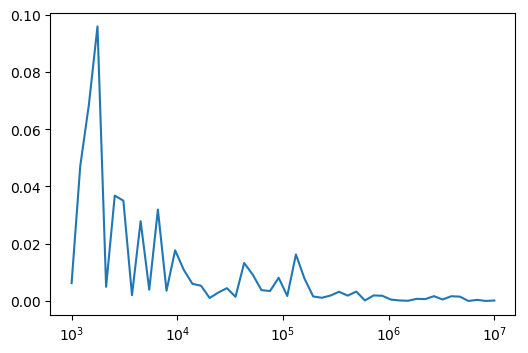

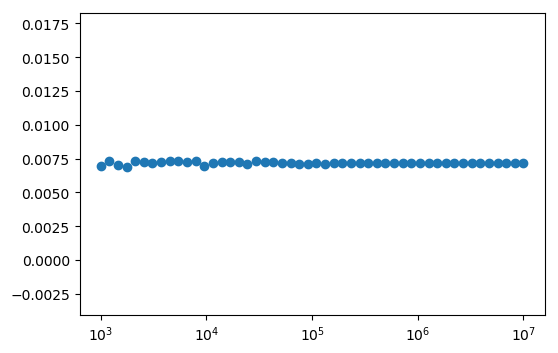

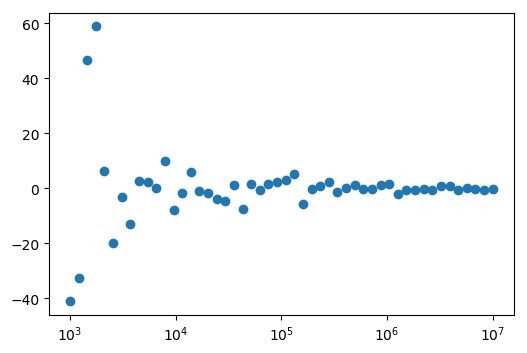

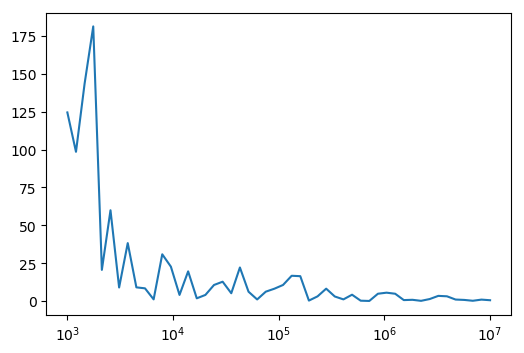

In [299]:
data=results["MC_bump_2Seeds"]

BS_p = BS_P()

# SE of MC estimate
plt.figure(dpi=100)
# plt.scatter(data['x'],data['BS_p'], label='BS', s=15)
plt.axhline(y=BS_P(), color='r', linestyle=':', label='BS')
plt.scatter(data['x'], data['p'], label = 'MC', s=15)
plt.errorbar(data['x'], data['p'], yerr = [i*2 for i in data['SE']], fmt='none')
plt.xscale('symlog')
plt.legend()
plt.savefig('images/assigment2/MC_Bump2Seeds_SE.png')
plt.show()

# Relative error MC estimate
plt.figure(dpi=100)
plt.plot(data['x'], [np.abs((BS_p-i)/BS_p) for i in data['p']])
plt.xscale('symlog')
plt.savefig('images/assigment2/MC_Bump2Seeds_RE.png')
plt.show()

# Variance
plt.figure(dpi=100)
plt.scatter(data['x'], data['var_delta'])
plt.xscale('symlog')
plt.show()

# Delta
plt.figure(dpi=100)
plt.scatter(data['x'], data['delta'])
plt.xscale('symlog')
plt.show()

# Delta Relative Error
plt.figure(dpi=100)
plt.plot(data['x'], [np.abs((BS_d-i)/BS_d) for i in data['delta']])
plt.xscale('symlog')
plt.savefig('images/assigment2/MC_Bump_delta_RE.png')
plt.show()